In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import pickle

In [2]:
df = pd.read_csv("./data/gemstone.csv")
df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,NaN,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,NaN,VS1,61.6,56.0,4.38,4.41,NaN,666.0
4,4,1.70,Premium,G,NaN,62.6,59.0,7.65,NaN,4.77,14453.0
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506.0
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229.0
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,NaN
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,NaN,2.70,886.0
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421.0


In [3]:
df.isnull().sum()

id             0
carat       8710
cut         9150
color      13471
clarity     8705
depth       8646
table      10625
x          10720
y          12007
z           8465
price      11699
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194347 entries, 0 to 194346
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       194347 non-null  int64  
 1   carat    185637 non-null  float64
 2   cut      185197 non-null  object 
 3   color    180876 non-null  object 
 4   clarity  185642 non-null  object 
 5   depth    185701 non-null  float64
 6   table    183722 non-null  float64
 7   x        183627 non-null  float64
 8   y        182340 non-null  float64
 9   z        185882 non-null  float64
 10  price    182648 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.3+ MB


In [5]:
df.shape

(194347, 11)

In [6]:
df.dropna(subset = ['price'], inplace=True)

In [7]:
df.shape

(182648, 11)

In [8]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,NaN,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,NaN,VS1,61.6,56.0,4.38,4.41,NaN,666.0
4,1.70,Premium,G,NaN,62.6,59.0,7.65,NaN,4.77,14453.0


In [10]:
df.shape

(182648, 10)

/home/pritesh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


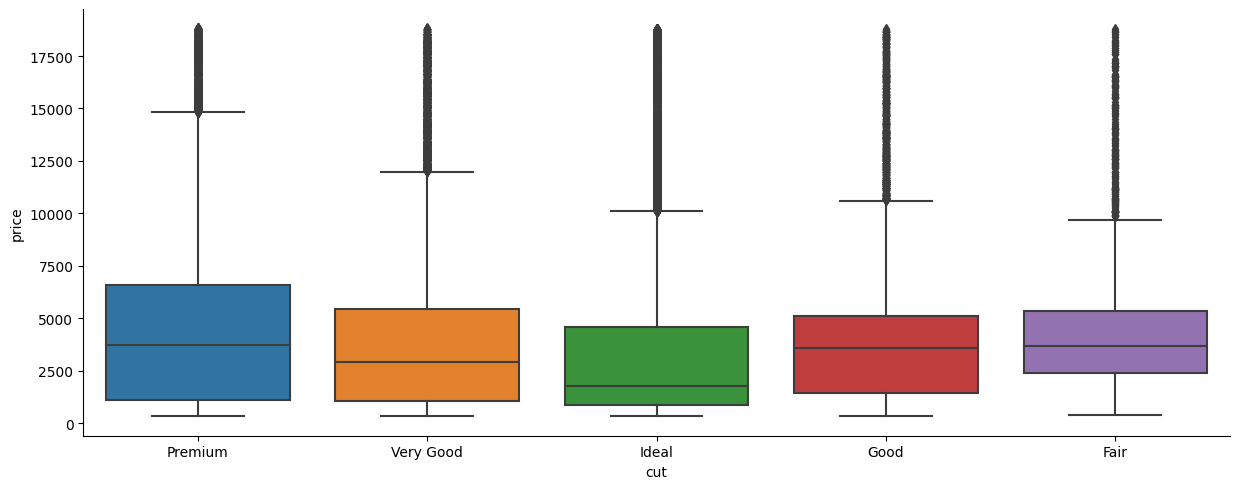

In [11]:
sns.catplot(x = 'cut',y = "price", data=df, kind='box',aspect=2.5)

/home/pritesh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


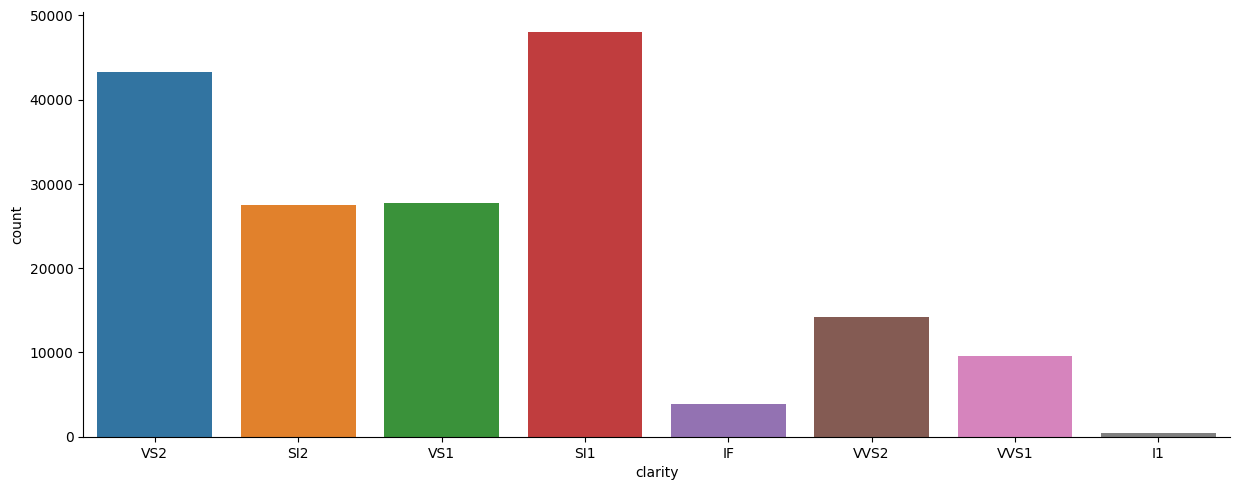

In [12]:
# EDA for categorical columns 'Clarity'.
sns.catplot(x='clarity', data=df, kind='count',aspect=2.5)

/home/pritesh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


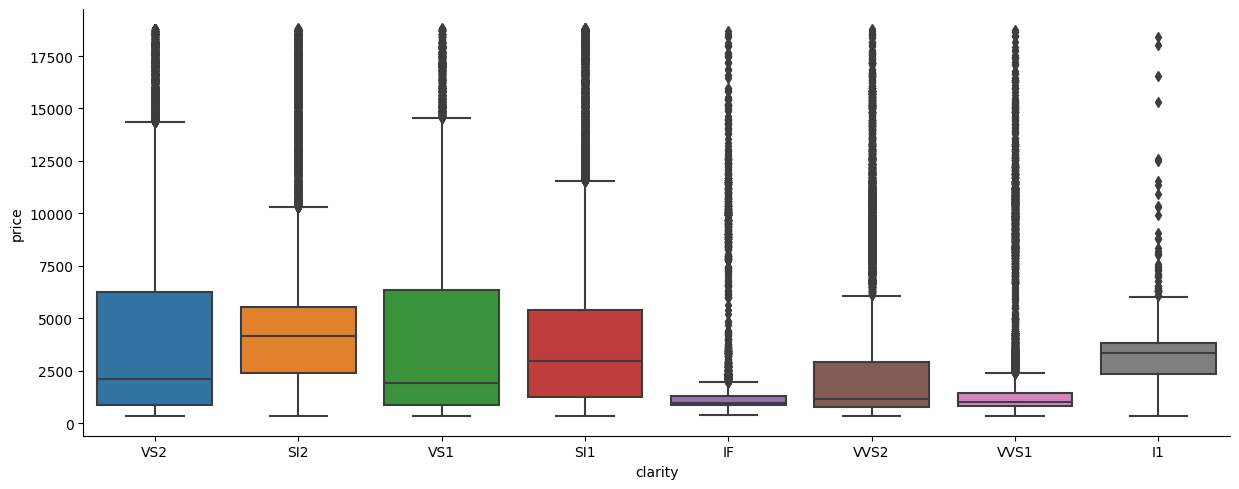

In [13]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')

In [14]:
df['cut'].value_counts()

cut
Ideal        83118
Premium      44886
Very Good    33786
Good         10450
Fair          1823
Name: count, dtype: int64

In [15]:
df['color'].value_counts()

color
G    39058
E    31500
F    30048
H    27078
D    21293
I    15338
J     5693
Name: count, dtype: int64

In [16]:
df['clarity'].value_counts()

clarity
SI1     48013
VS2     43253
VS1     27700
SI2     27476
VVS2    14176
VVS1     9585
IF       3828
I1        460
Name: count, dtype: int64

#### 
EDA-Step-1: Checking for duplicate records in the data.

In [17]:
## check for duplicated records
df.duplicated().sum()

731

In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (182648, 10)
After (181917, 10)


In [19]:
## check for duplicated records
df.duplicated().sum()

0

In [20]:
## segregate numerical and categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


#### EDA-Step 2: Checking Missing value.

In [21]:
# Are there any missing values ?
df.isnull().sum()

carat       8168
cut         8543
color      12604
clarity     8140
depth       8038
table       9947
x          10070
y          11223
z           7939
price          0
dtype: int64

<Axes: >

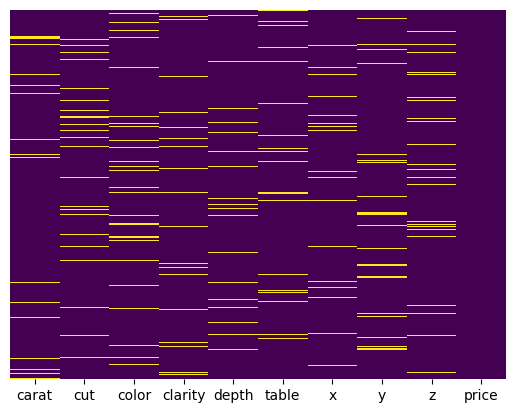

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

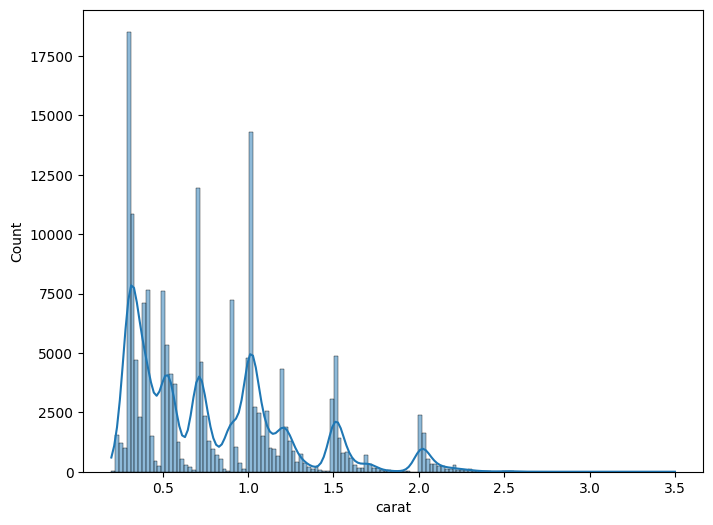

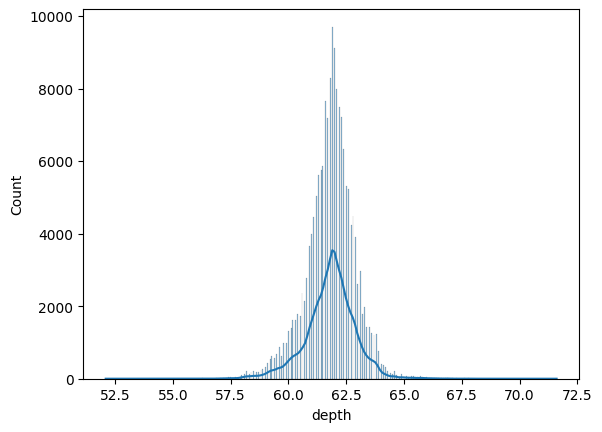

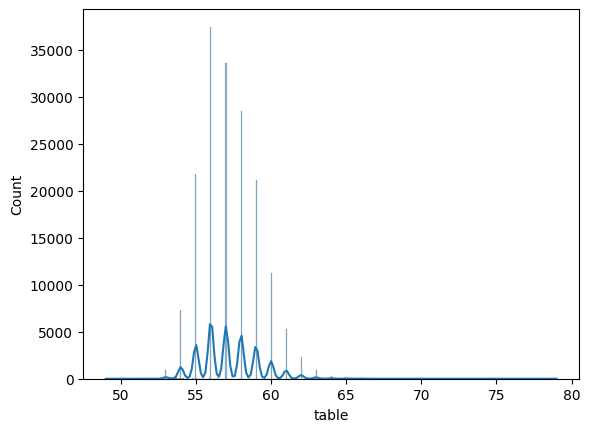

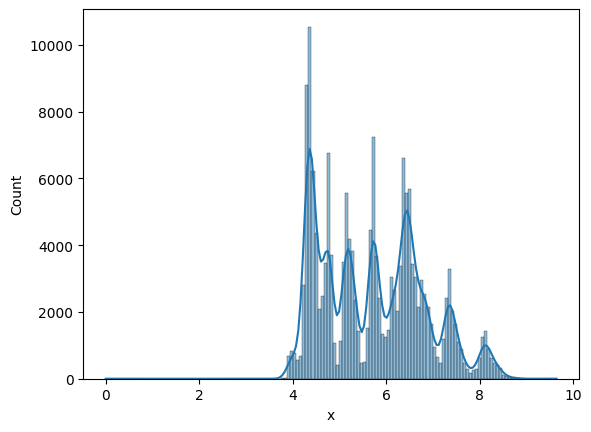

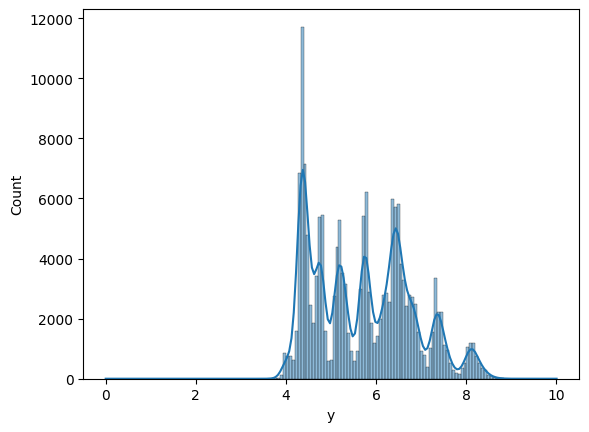

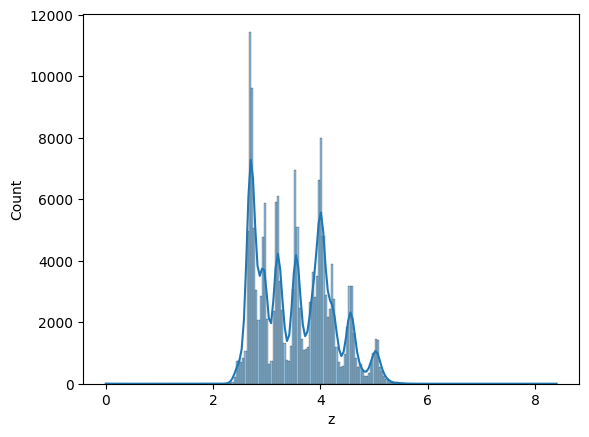

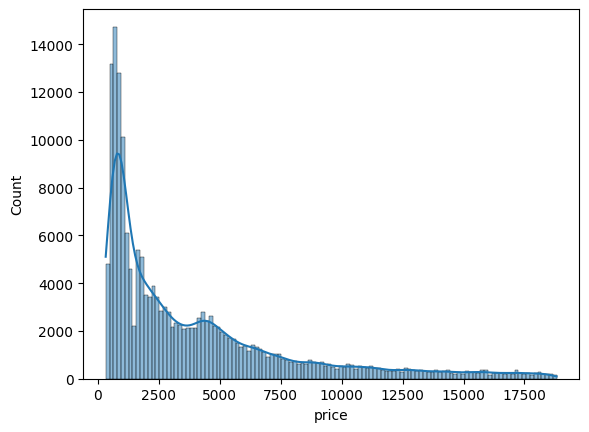

In [23]:
plt.figure(figsize=(8,6))
x=None
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

#### EDA-Step 3 : Outlier Checks.

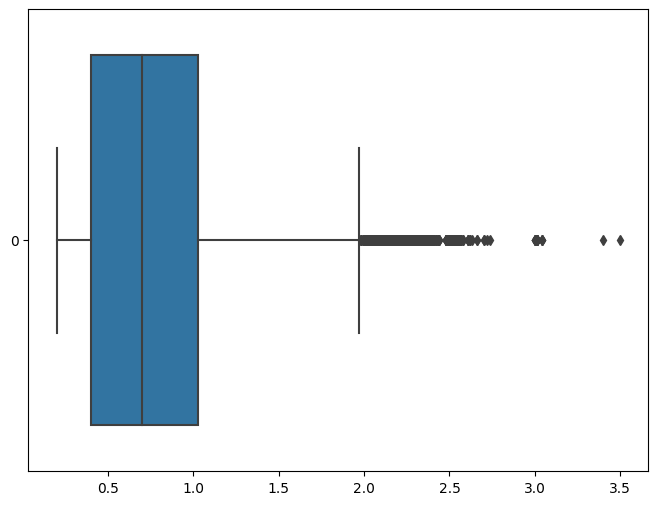

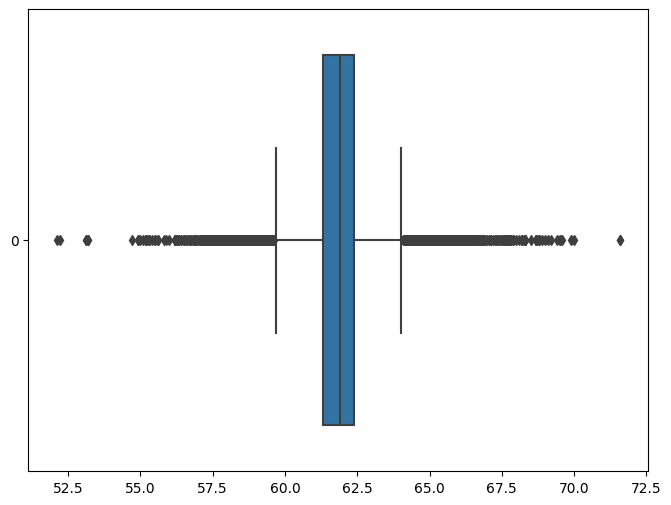

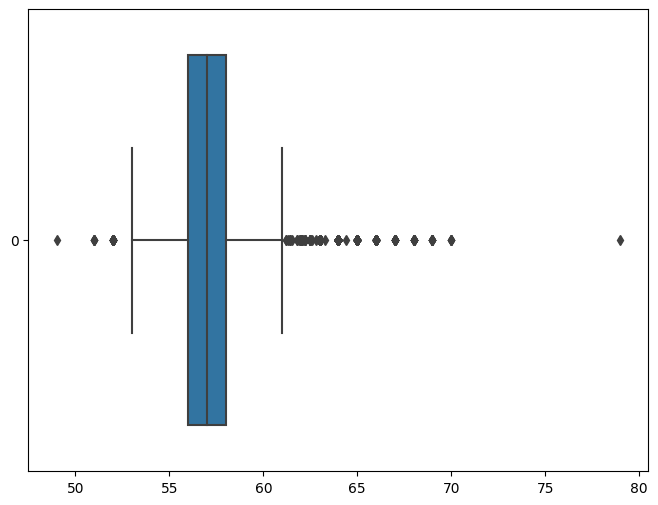

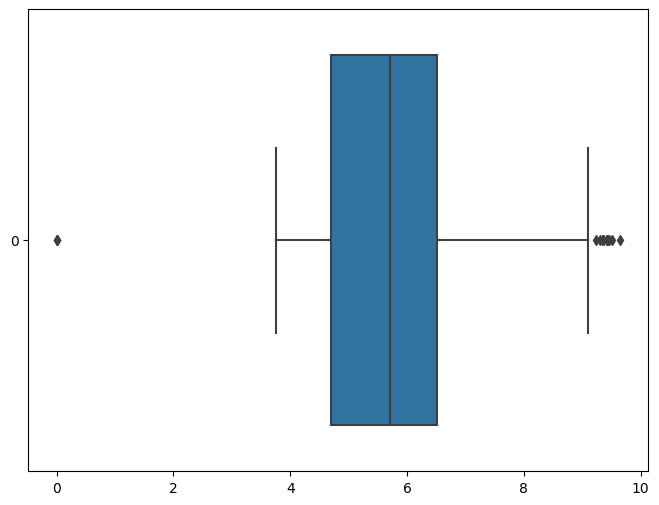

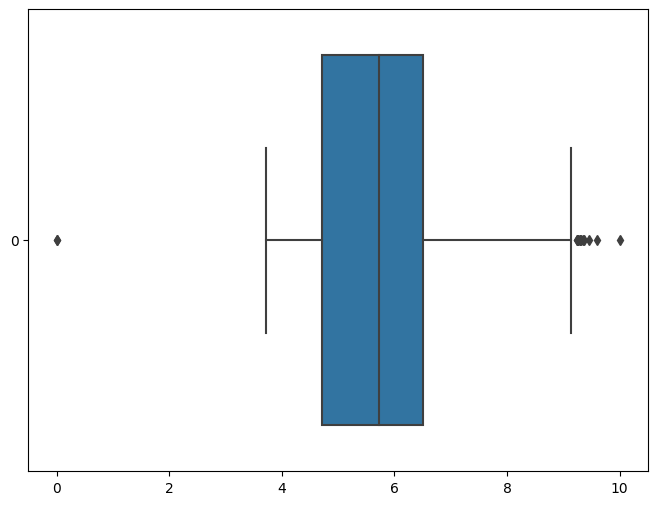

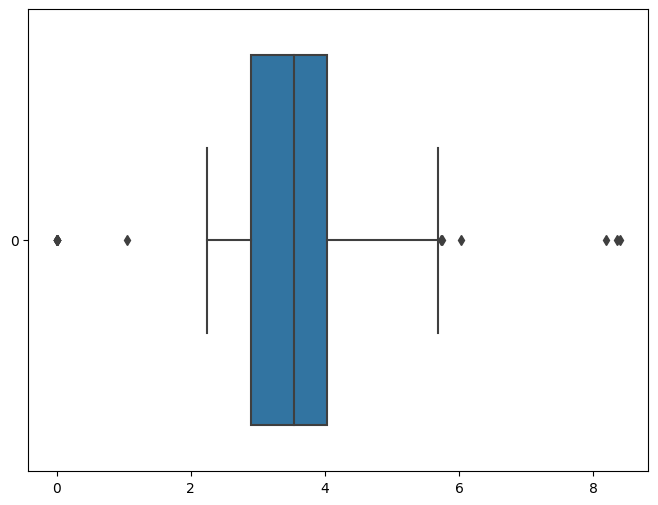

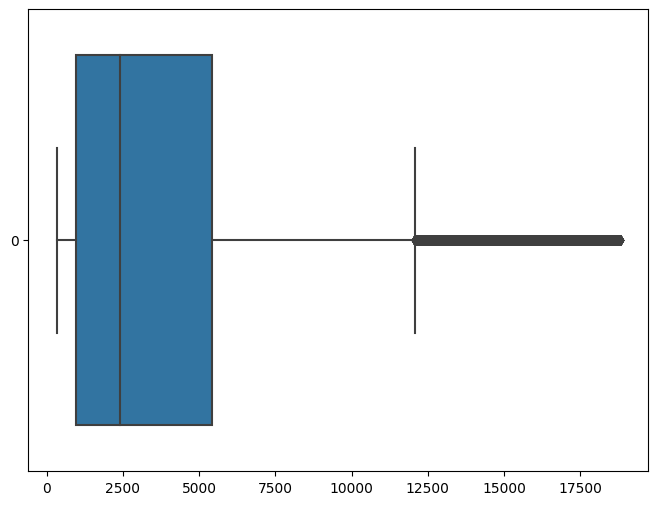

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[i],whis=1.5, orient = 'h')
    print('\n')
    plt.show()

In [25]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [26]:
df.shape

(181917, 10)

In [27]:
### Outlier treatment :
def remove_outlier(column):
    col = np.array(df[column])
    if len(col) == 0:
        print("error")
        return None,None
    col_without_nan = col[~np.isnan(col)]
    Q1, Q3 = np.percentile(col_without_nan, [25, 75])
    # print(Q1,Q3)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    print(lower_range, upper_range)
    return column,lower_range, upper_range

In [28]:
outlier_removal_list = ['x', 'y', 'z','depth', 'table']

In [29]:
outlier_remover_whisker = []
for col in outlier_removal_list:
    print(col)
    a=remove_outlier(col)
    outlier_remover_whisker.append(a)
    
        

x
1.9850000000000008 9.225
y
2.0100000000000002 9.209999999999999
z
1.2049999999999994 5.7250000000000005
depth
59.64999999999999 64.05
table
53.0 61.0


In [30]:
df.shape

(181917, 10)

In [31]:
index_to_drop =  df[df['x'] > 9.225].index
df.drop(index_to_drop, inplace=True)



In [32]:
index_to_drop =  df[df['x'] < 1.98].index
df.drop(index_to_drop, inplace=True)

In [33]:
df.shape

(181900, 10)

In [34]:
index_to_drop =  df[df['y'] < 2.012].index
df.drop(index_to_drop, inplace=True)
index_to_drop =  df[df['y'] > 9.2].index
df.drop(index_to_drop, inplace=True)

In [35]:
df.shape

(181900, 10)

In [36]:
index_to_drop =  df[df['z'] < 1.2].index
df.drop(index_to_drop, inplace=True)
index_to_drop =  df[df['z'] > 5.75].index
df.drop(index_to_drop, inplace=True)

In [37]:
df.shape

(181890, 10)

In [38]:
index_to_drop =  df[df['depth'] < 59.64].index
df.drop(index_to_drop, inplace=True)
index_to_drop =  df[df['depth'] > 64.05].index
df.drop(index_to_drop, inplace=True)

In [39]:
df.shape

(172935, 10)

In [40]:
index_to_drop =  df[df['table'] < 53].index
df.drop(index_to_drop, inplace=True)
index_to_drop =  df[df['table'] > 61].index
df.drop(index_to_drop, inplace=True)

In [41]:
df.shape

(170317, 10)

In [42]:
df.isnull().sum()

carat       7656
cut         8013
color      11819
clarity     7613
depth       7871
table       9434
x           9442
y          10438
z           7435
price          0
dtype: int64

In [43]:
#impution of all 'Na' values from texual column with Mode of respective column
for val in categorical_columns:
    if df[val].isna().sum()>0:
        df[val]=df[val].fillna(df[val].mode()[0])

In [44]:
for val in numerical_columns:
    if df[val].isna().sum()>0:
        df[val]=df[val].fillna(df[val].median())

In [45]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

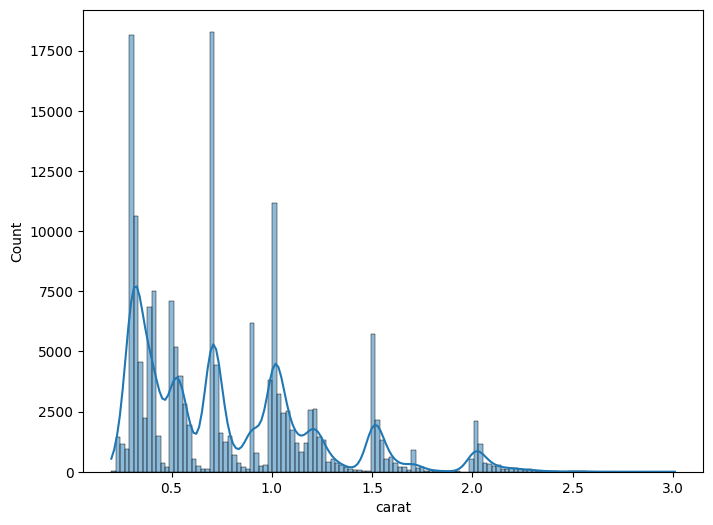

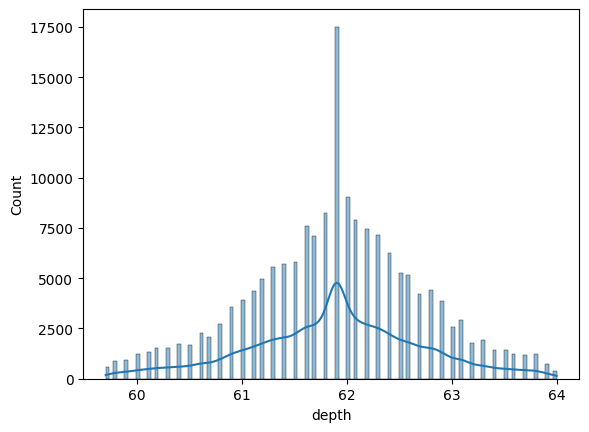

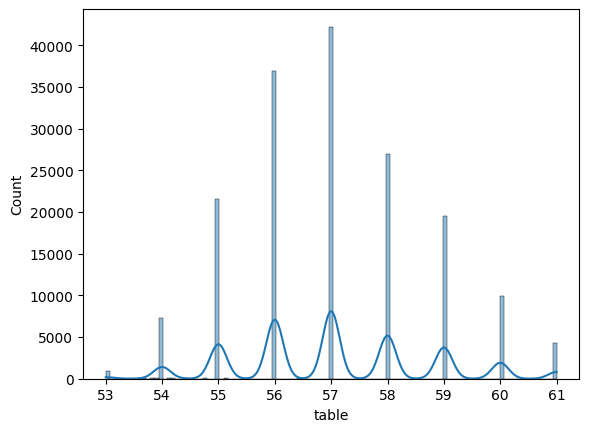

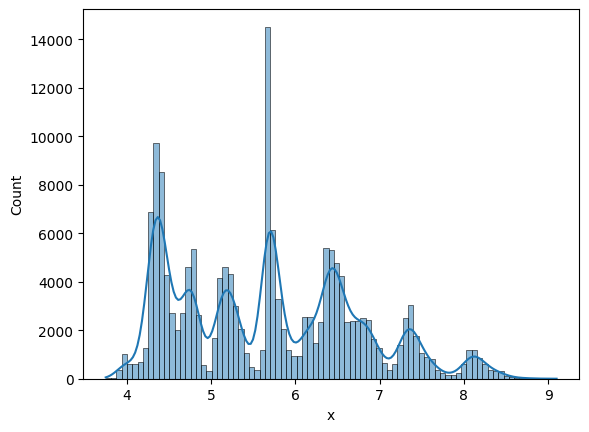

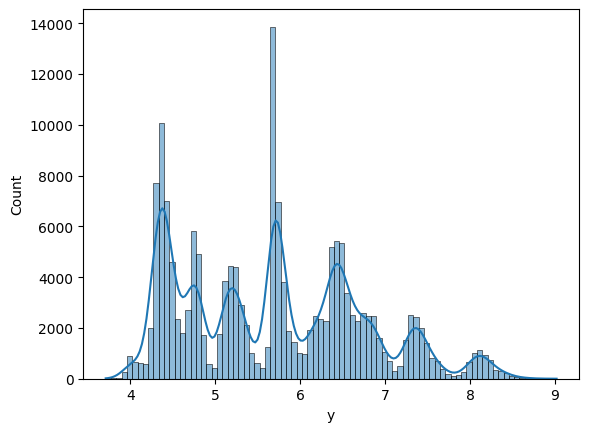

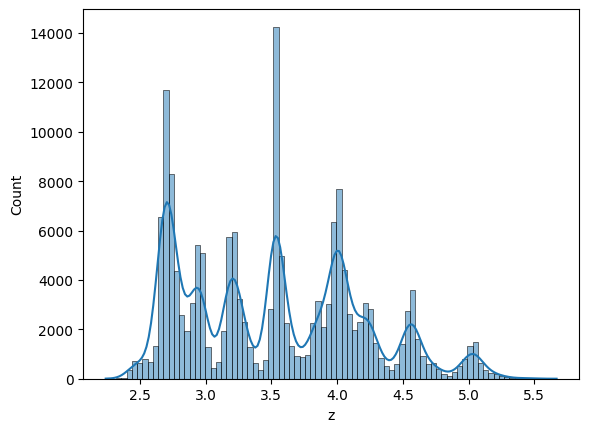

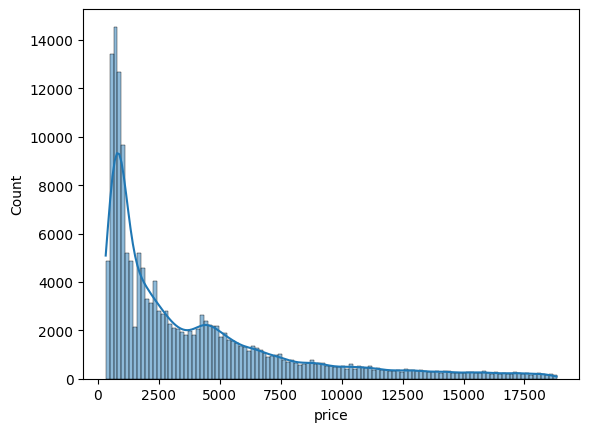

In [46]:
plt.figure(figsize=(8,6))
x=None
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

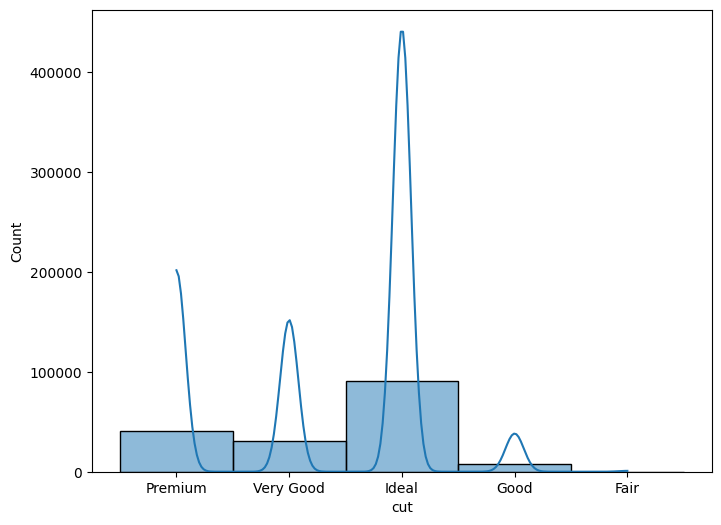

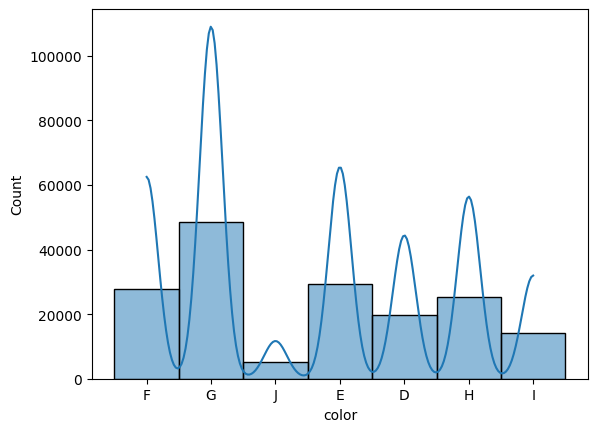

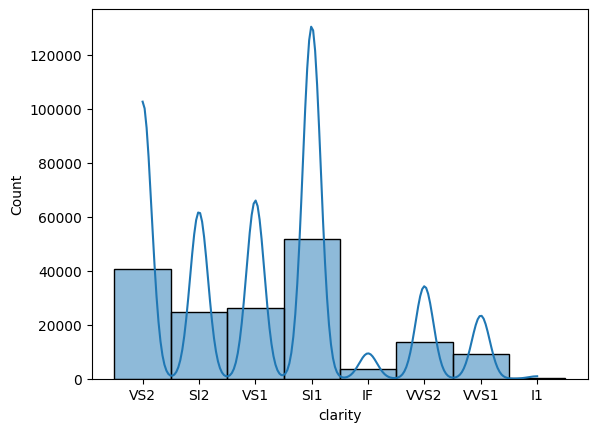

In [47]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

/home/pritesh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


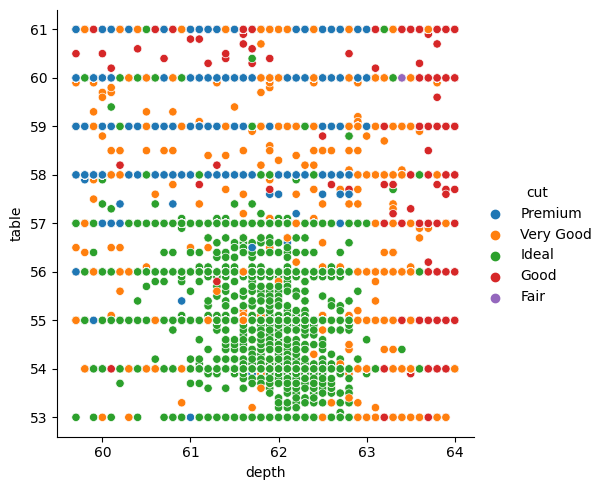

In [48]:
sns.relplot(x = 'depth', y = 'table' , data = df,hue = 'cut' )

/home/pritesh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


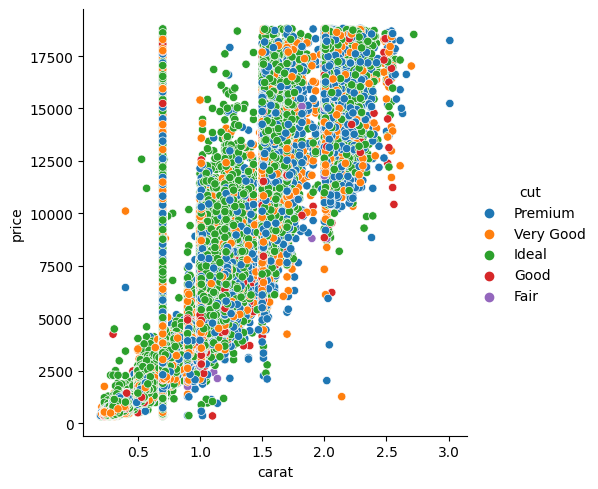

In [49]:
sns.relplot(x = 'carat' , y = 'price' , data = df, hue= 'cut' )

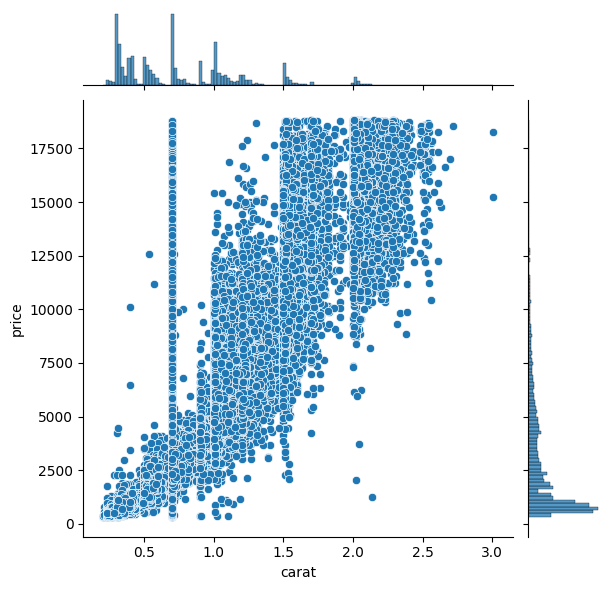

In [50]:
sns.jointplot(x = 'carat' , y = 'price',data=df)

In [51]:
df_work = df.copy()

In [52]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [53]:
df_work['cut']=df_work['cut'].map(cut_map)
df_work['clarity'] = df_work['clarity'].map(clarity_map)
df_work['color'] = df_work['color'].map(color_map)

<Axes: >

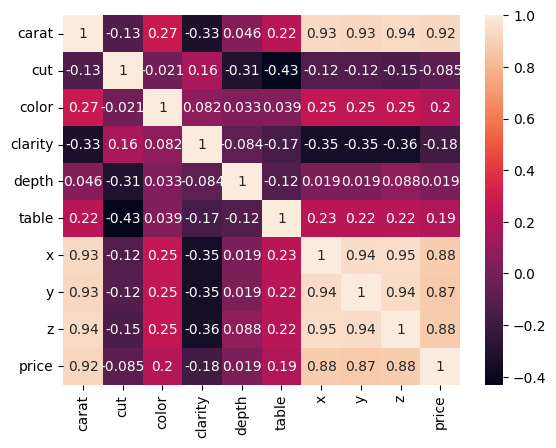

In [54]:
sns.heatmap(df_work.corr(),annot=True)

In [55]:
def calculate_vf(mydata):
    vif= pd.DataFrame()
    vif["Features"] = mydata.columns
    vif["VIF"] = [variance_inflation_factor(mydata.values,i) for i in range(len(mydata.columns))]
    return(vif)

In [56]:
# the independent variables set
dataset_vif = df_work.drop(labels = "price",axis = 1)
#df.iloc[:,:-1]

In [57]:
dataset_vif.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,4,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,3.52
4,1.70,4,4,3,62.6,59.0,7.65,5.69,4.77


In [58]:
dataset_vif.shape

(170317, 9)

In [59]:
dataset_vif.values

array([[1.52, 4.  , 3.  , ..., 7.27, 7.33, 4.55],
       [2.03, 3.  , 4.  , ..., 8.06, 8.12, 5.05],
       [0.7 , 5.  , 4.  , ..., 5.69, 5.73, 3.5 ],
       ...,
       [0.7 , 4.  , 4.  , ..., 5.75, 5.77, 3.47],
       [0.7 , 3.  , 3.  , ..., 5.72, 5.75, 3.62],
       [0.34, 3.  , 1.  , ..., 4.45, 4.49, 2.81]])

In [60]:
vif_result = calculate_vf(dataset_vif)
vif_result

,Features,VIF
0,carat,40.804670
1,cut,23.777261
2,color,6.891398
3,clarity,9.749062
4,depth,1141.559857
5,table,997.984187
6,x,379.421497
7,y,352.681747
8,z,428.993357


In [61]:
df_work.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,3,4,2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,5,4,5,61.6,56.0,4.38,4.41,3.52,666.0
4,1.70,4,4,3,62.6,59.0,7.65,5.69,4.77,14453.0


In [62]:
dataset_vif2 = df_work.drop(labels=["z"],axis = 1)

In [63]:
dataset_vif2.head()

,carat,cut,color,clarity,depth,table,x,y,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,13619.0
1,2.03,3,4,2,62.0,58.0,8.06,8.12,13387.0
2,0.70,5,4,5,61.2,57.0,5.69,5.73,2772.0
3,0.32,5,4,5,61.6,56.0,4.38,4.41,666.0
4,1.70,4,4,3,62.6,59.0,7.65,5.69,14453.0


In [64]:
vif_result2 = calculate_vf(dataset_vif2)
vif_result2

,Features,VIF
0,carat,56.915334
1,cut,23.597634
2,color,7.253194
3,clarity,11.466293
4,depth,1093.151487
5,table,991.231970
6,x,324.487686
7,y,307.955711
8,price,16.366970


In [65]:
df_work.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,3,4,2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,5,4,5,61.6,56.0,4.38,4.41,3.52,666.0
4,1.70,4,4,3,62.6,59.0,7.65,5.69,4.77,14453.0


In [66]:
df_work.drop(columns=['depth','table','x','z'],inplace=True)

In [67]:
df_work.head()

,carat,cut,color,clarity,y,price
0,1.52,4,3,4,7.33,13619.0
1,2.03,3,4,2,8.12,13387.0
2,0.70,5,4,5,5.73,2772.0
3,0.32,5,4,5,4.41,666.0
4,1.70,4,4,3,5.69,14453.0


In [68]:
x = df_work.drop(labels=['price'],axis=1)
y = df_work[['price']]

### 1.5 Train test split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [70]:
x_train.head()

,carat,cut,color,clarity,y
155495,0.25,5,3,3,4.09
46508,0.34,3,5,4,4.55
130549,0.70,5,2,5,5.70
23370,1.52,4,6,2,7.40
91824,0.31,5,5,3,4.32


In [71]:
y_train.head()

,price
155495,430.0
46508,689.0
130549,3018.0
23370,7695.0
91824,558.0


### Creating and Training Model

In [72]:
def create_model_lr():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

In [73]:
def create_model_lasso():
    from sklearn.linear_model import Lasso
    model = Lasso(alpha=1.0)
    model.fit(x_train, y_train)
    return model

In [74]:
def create_model_ridge():
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=1.0)
    model.fit(x_train, y_train)
    return model

In [75]:
def create_model_gb():
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=25, max_depth=100)
    model.fit(x_train, y_train)
    return model

In [76]:
def create_model_ada():
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor()
    model.fit(x_train, y_train)
    return model

In [77]:
def create_model_DT_regressor():
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor(random_state = 0) 
    model.fit(x_train,y_train)
    return model

In [78]:
model_lr = create_model_lr()
model_lasso = create_model_lasso()
model_ridge = create_model_ridge()
model_gb = create_model_gb()
model_ada = create_model_ada()
model_dt = create_model_DT_regressor()

/home/pritesh/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pritesh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def model_evaluation(model_name, model):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    return model_name,mae,mse,rmse,r2

In [80]:
df_model = pd.DataFrame(columns=['model name','MAE','MSE','RMSE','r2_score'])
model_list = [model_evaluation('lr',model_lr),
    model_evaluation('lasso',model_lasso),
    model_evaluation('ridge',model_ridge),
    model_evaluation('gb',model_gb),
    model_evaluation('ada',model_ada),
    model_evaluation('DT',model_dt)
]

In [81]:
model_list

[('lr',
  972.2493886778027,
  1922301.5011684876,
  1386.4708800290352,
  0.8793490715163924),
 ('lasso',
  972.4888076131364,
  1922377.7979096842,
  1386.4983944850726,
  0.8793442828437206),
 ('ridge',
  972.3041399551157,
  1922314.3076088927,
  1386.4754983802968,
  0.8793482677356512),
 ('gb',
  495.8695115493704,
  798920.0305523634,
  893.8232658374716,
  0.9498567506649176),
 ('ada',
  846.6864777096096,
  1661809.930935056,
  1289.1120707429031,
  0.8956985098285991),
 ('DT',
  437.05762178514743,
  779410.6829783437,
  882.8423885260288,
  0.9510812312666775)]

In [82]:
row = 0
for ele in model_list:
    df_model.loc[row] = ele
    row += 1
df_model

,model name,MAE,MSE,RMSE,r2_score
0,lr,972.249389,1.922302e+06,1386.470880,0.879349
1,lasso,972.488808,1.922378e+06,1386.498394,0.879344
2,ridge,972.304140,1.922314e+06,1386.475498,0.879348
3,gb,495.869512,7.989200e+05,893.823266,0.949857
4,ada,846.686478,1.661810e+06,1289.112071,0.895699
5,DT,437.057622,7.794107e+05,882.842389,0.951081


In [83]:
with open('model_lr.pkl','wb') as file:
    pickle.dump(model_lr,file)
with open('model_lasso.pkl','wb') as file:
    pickle.dump(model_lasso,file)
with open('model_ridge.pkl','wb') as file:
    pickle.dump(model_ridge,file)
with open('model_gb.pkl','wb') as file:
    pickle.dump(model_gb,file)
with open('model_ada.pkl','wb') as file:
    pickle.dump(model_ada,file)
with open('model_dt.pkl','wb') as file:
    pickle.dump(model_dt,file)

In [84]:
df_work.head()

,carat,cut,color,clarity,y,price
0,1.52,4,3,4,7.33,13619.0
1,2.03,3,4,2,8.12,13387.0
2,0.70,5,4,5,5.73,2772.0
3,0.32,5,4,5,4.41,666.0
4,1.70,4,4,3,5.69,14453.0


In [85]:
resultt = model_lr.predict([[1.52,4,3,4,7.33]])
resultt

/home/pritesh/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10688.81663755]])

In [86]:
resultt = model_lasso.predict([[1.52,4,3,4,7.33]])
resultt

/home/pritesh/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([10683.34016116])